In [2]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import kstest, shapiro
from subprocess import check_output
import matplotlib.colors as colors

In [3]:
UPPER_BOUND = 7
df = [DataFrame()] * UPPER_BOUND
for i in range(UPPER_BOUND):
	stdout = check_output(["node", "gaussian.mjs", f"{10 ** (i + 1)}"]).decode("utf-8")
	# print(stdout)
	data = list(map(float, stdout.split('\n')[:-1]))
	# print(data)
	df[i] = DataFrame(data=data, columns=["x"])

In [4]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
print("Kolmogorov-Smirnov", "Shapiro-Wilk")
for i in range(UPPER_BOUND):
	print(i + 1, kstest(df[i]["x"], "norm").pvalue, shapiro(df[i]["x"]).pvalue)

Kolmogorov-Smirnov Shapiro-Wilk
1 0.20443786159464117 0.7950140237808228
2 0.23565555184258635 0.4608287811279297
3 0.6674890016845768 0.768637478351593
4 0.8427380031135887 0.457838773727417
5 0.8391159798968792 0.9999657273292542


/usr/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


6 0.1434974014440339 1.0
7 0.3929800478944663 0.0


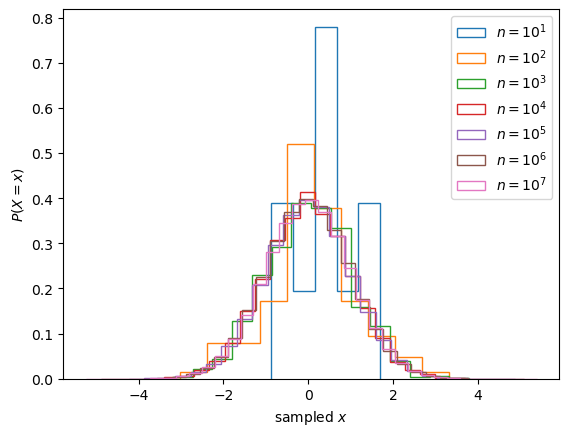

In [11]:
color_options = list(colors.TABLEAU_COLORS.keys())
for i in range(UPPER_BOUND):
	plt.hist(df[i], ec=color_options[i], bins=5 * (i + 1), density=True, histtype="step", label=f"$n = 10^{{{i + 1}}}$")
plt.legend()
# plt.grid(True)
# plt.title("Visualisation Test of the gaussian NPM Package ($\mu = 0$, $\sigma^2 = 1$)")
plt.xlabel("sampled $x$")
plt.ylabel("$P(X = x)$")
plt.show()
# plt.savefig("bell.svg")